##   Курсовая работа. Блок ML Beginner

  Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
- 1. Описание данных (с расчетом базовых статистик),
- 2. Исследование зависимостей и формулирование гипотез,
- 3. Построение моделей для прогнозирования оттока (с обоснованием выбора той или иной модели) на основе проверенных гипотез и выявленных взаимосвязей,
- 4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
В четвертом дополнительно должны быть сформулированы общие выводы работы.

customerID – id клиента
gender – пол клиента (male/female)
SeniorCitizen – яляется ли клиент пенсионером (1, 0)
Partner – состоит ли клиент в браке (Yes, No)
Dependents – есть ли у клиента иждивенцы (Yes, No)
tenure – сколько месяцев человек являлся клиентом компании
PhoneService – подключена ли услуга телефонной связи (Yes, No)
MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
Contract – тип контракта клиента (Month-to-month, One year, Two year)
PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges – месячный размер оплаты на настоящий момент
TotalCharges – общая сумма, которую клиент заплатил за услуги за все время
Churn – произошел ли отток (Yes or No)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Загружаем данные

telecom = pd.read_csv('telecom_users.csv')
telecom.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### 1. Описание данных

In [3]:
# посмотрим есть ли пустые значения в столбцах и какие типы данных в столбцах

telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Dataframe заполнен полностью, пропущенных значений нет.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [4]:
# выводим статистические данные для числових значений

telecom.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [5]:
# выводим статистические данные для текстовых значений

telecom.describe(include=[np.object])

<ipython-input-5-d4ef9addac65>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  telecom.describe(include=[np.object])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,6527-PZFPV,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


In [6]:
# Посчитаем процент оттока клиентов за период

count = len(telecom.Churn)
yes = (telecom.Churn == 'Yes').sum()
no = (telecom.Churn == 'No').sum()
print(f'Продлили контрак {no} человек', 
      f'\nНе продлили контракт {yes} человек', 
      f'\nПроцент оттока клиентов равен {(yes * 100 // count)}%')

Продлили контрак 4399 человек 
Не продлили контракт 1587 человек 
Процент оттока клиентов равен 26%


Для дальнейшей работы подготовим данные, изменив значения на бинарные и числовые

In [7]:
telecom['gender'] = telecom['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
telecom['Partner'] = telecom['Partner'].map( {'No': 0, 'Yes': 1} ).astype(int)
telecom['Dependents'] = telecom['Dependents'].map( {'No': 0, 'Yes': 1} ).astype(int)
telecom['PhoneService'] = telecom['PhoneService'].map( {'No': 0, 'Yes': 1} ).astype(int)
telecom['MultipleLines'] = telecom['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service': 2} ).astype(int)
telecom['InternetService'] = telecom['InternetService'].map( {'No': 0, 'Fiber optic': 1, 'DSL': 2} ).astype(int)
telecom['OnlineSecurity'] = telecom['OnlineSecurity'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
telecom['OnlineBackup'] = telecom['OnlineBackup'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
telecom['DeviceProtection'] = telecom['DeviceProtection'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
telecom['TechSupport'] = telecom['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)

telecom['StreamingTV'] = telecom['StreamingTV'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
telecom['StreamingMovies'] = telecom['StreamingMovies'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
telecom['Contract'] = telecom['Contract'].map( {'Month-to-month': 0, 'One year': 1, 'Two year': 2} ).astype(int)
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map( {'No': 0, 'Yes': 1} ).astype(int)

telecom['PaymentMethod'] = telecom['PaymentMethod'].map( {'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3} ).astype(int)
telecom['Churn'] = telecom['Churn'].map( {'No': 0, 'Yes': 1} ).astype(int)

Выводы:

- Пропущенных данных нет
- Клиентов мужчин больше, чем женщин.
- Медианное количество месяцев подписки чуть больше 29. Максимальное - 72.
- Большинство клиентов не состоят в браке а так же не имеют иждивенцев.
- Интернет провайдером большинства клиентов является Fiber optic.
- Большинство клиентов не пользуются дополнительными услугами.
- Больше половины клиентов имеют тип контракта Month-to-month.
- Большая часть клиентов использует безбумажный биллинг.
- Electronic check является приоритетным способом оплаты.
- Медианный месячный платеж = 70.4 у.е.
- Процент оттока клиентов составил 26%

### 2. Исследование зависимостей и формулирование гипотез

In [8]:
# Удаляем столбецы с ID клиента и Unnamed, так как это не нужные признаки

del telecom['customerID']
del telecom['Unnamed: 0']

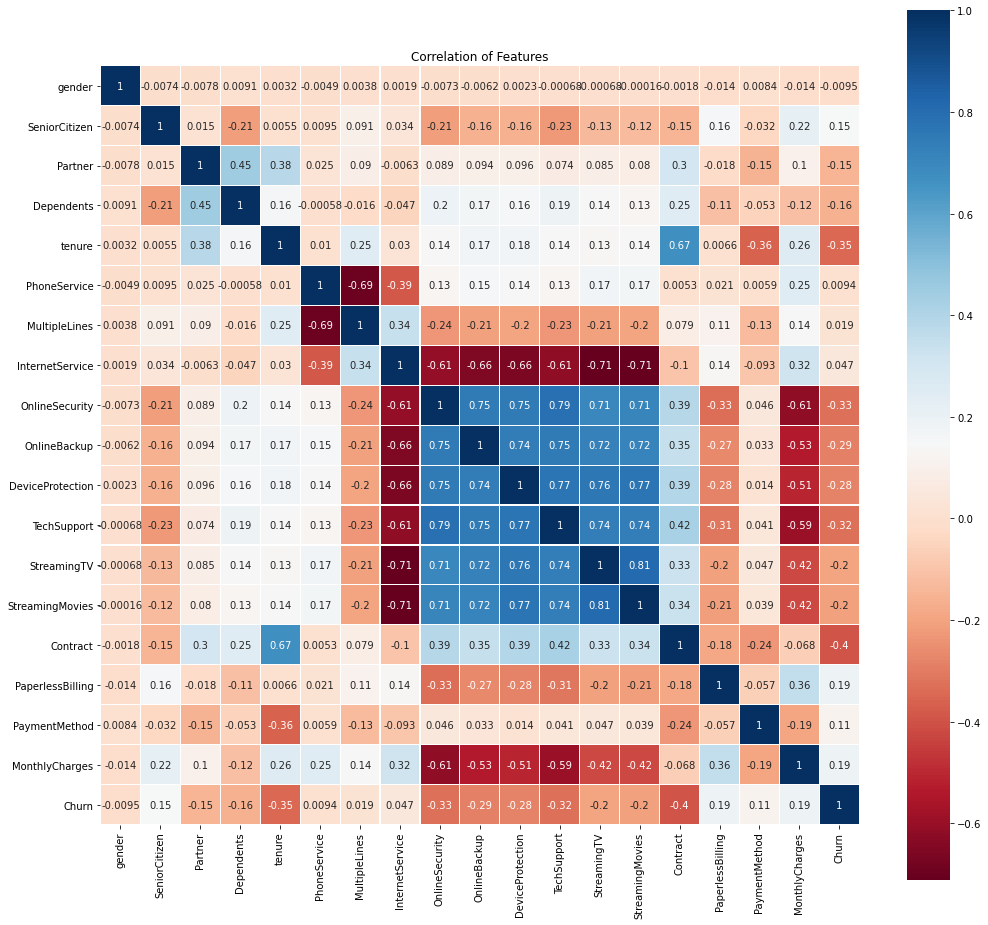

In [9]:
#Посмотрим на корреляционные связи между признаками

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.RdBu
plt.figure(figsize=(17,16))
plt.title('Correlation of Features', y=1, size=12)
sns.heatmap(telecom.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()

С целевой переменной Churn имеется обратная корреляционная связь с признаками: Tenure, OnlineSecurity,  OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMoveis, Contract, и слабая корреляция с SeniorCitizen, MonthlyCharges, PaperlessBilling, PaymentMethod.

In [10]:
# Посмтотрим на процентное соотношениям клиентов при использовании услуг как действующих так и расторгнувших договор клиентов

data = telecom[['Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'SeniorCitizen', 'PaperlessBilling']] \
                .groupby('Churn').agg('sum')
data.iloc[0,:] = data.iloc[0,:]//((telecom.Churn.count()-telecom.Churn.sum())/100)
data.iloc[1,:] = data.iloc[1,:]//(telecom.Churn.sum()/100)
data

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,PaperlessBilling
Churn,,,,,,,,
0,87,91,90,87,90,91,12,53
1,27,40,41,29,55,56,25,74


Из этой таблицы видно, что те кто продлевают контракт,из них 87% клиентов подключили услугу онлайн-безопасности, 91% - услугу услуга online backup,90% - защиты устройства и так далее
А вот почти 50% пенсионеров расторгают договор - это повод рассмотреть эту категорию поподробней
Так же видно, что клиенты пользующиеся безбумажным биллингом склонны к оттоку

Отобразим все на столбчатом графике

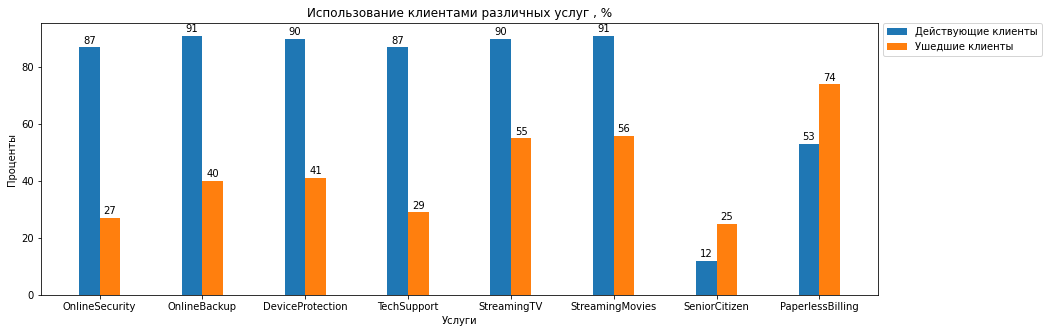

In [11]:
# Список действующих клиентов:

active_clients = data.iloc[0,:]
churn_clients = data.iloc[1,:]

# Координаты столбцов по оси х:

labels = data.columns
x = np.arange(len(labels))

# Строим график, задаем параметры, размеры
fig, ax = plt.subplots(figsize=(15,5)) 

# Рисуем колонки с действующими клиентами
active = ax.bar(x - 0.2/2, active_clients, width=0.2, label='Действующие клиенты')  # Определение колонок для данных об отсавшихся клиентах

# Рисуем колонки с оттоком
churnn = ax.bar(x + 0.2/2, churn_clients, width=0.2, label='Ушедшие клиенты')   # Определение колонок для данных об ушедших клиентах

# Подписываем оси, таблицы, легенды
ax.set_xlabel('Услуги')
ax.set_ylabel('Проценты')
ax.set_title('Использование клиентами различных услуг , %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

# Создадим функцию для отображения столбцов с аннотациями
def autolabel(group):
    for gr in group:
        height = gr.get_height()
        # Задаем параметры для аннотаций
        ax.annotate('{}'.format(height),
                    xy=(gr.get_x() + gr.get_width() / 2, height), # Получение точек координат для текста
                    xytext=(0, 2),    # Высота текста над столбцами
                    # Расположение текста относительно столбцов
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(active)  # Выполнение функции для первой группы данных
autolabel(churnn)  # Выполнение функции для второй группы данных

plt.show()

Видно большую разницу между клиентами с услугами OnlineSecurity, TechSupport, OnlineBackup и DeviceProtection. Действующие клиенты пользуются этими услугами значительно больше. С бесбумажным биллингом все наоборот - клиенты, которые чаще используют электронный счёт рассторгали контрак

Посмотрим есть ли зависимость от провайдера PhoneService


In [12]:
# Считаем количесвто клиентов у каждого провайдера

cnt = telecom. groupby('InternetService')['InternetService'].count()

# Группируем по провайдеру и Churn
tp = telecom.groupby(['InternetService','Churn'])[['PhoneService']].count()
tp

PhoneService
InternetService Churn              
0               0              1192
                1                99
1               0              1536
                1              1091
2               0              1671
                1               397

In [13]:
# Преобразим в процентное соотношение

tp.PhoneService[0][0] = tp.PhoneService[0][0]/cnt[0]*100
tp.PhoneService[0][1] = tp.PhoneService[0][1]/cnt[0]*100

tp.PhoneService[1][0] = tp.PhoneService[1][0]/cnt[1]*100
tp.PhoneService[1][1] = tp.PhoneService[1][1]/cnt[1]*100

tp.PhoneService[2][0] = tp.PhoneService[2][0]/cnt[2]*100
tp.PhoneService[2][1] = tp.PhoneService[2][1]/cnt[2]*100

tp

PhoneService
InternetService Churn              
0               0                92
                1                 7
1               0                58
                1                41
2               0                80
                1                19

Здесь можно сделать вывод о том, что 41% клиентов от провайдера Fiber optic ушло в отток, и 19% ушло без провайдера
Значит комании стоит обратить внимание больше сотрудничать с DSL.

Идавайте посмотрим когда чаще люди уходят от telecom исходя из месяцев подписки

/Users/olgakamskaa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


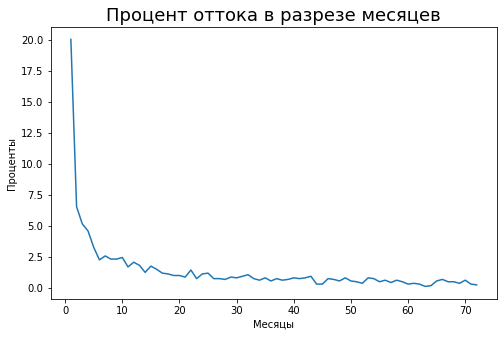

In [14]:
# Выбираем только клиентов расторгнувших договор и группируем по месецам подписки и суммируем

time = telecom[telecom.Churn==1][['Churn','tenure']].groupby('tenure').sum()

# Приводим столбец в проценты
time.Churn = list(map(lambda x: x / (telecom.Churn.sum() / 100), time.Churn))

# Отстраиваем график, подписи
plt.figure(figsize=(8,5))
plt.title('Процент оттока в разрезе месяцев', size=18)
plt.xlabel('Месяцы')
plt.ylabel('Проценты')
sns.lineplot(time.index, time.Churn)
plt.show()

Здесь хорошо видно, что люди уходя чаще в первые месяца подписки. Чем дольше клиент подписан, тем маловероятней, что он уйдет в отток


Выводы

- причины оттока связаны с тем, что у клиентов нет подписок на такие услуги как: услуги безопасности, страховка оборудования, техническая поддержка, услуга стримингового телевидения и кинотеатра, и использование электронных счетов.
- много клиентов уходило от провайдера Fiber optic
- Большинство клиентов из группы оттока ушли пользуясь связью менее года.

### 3. Построение моделей для прогнозирования оттока

Согласно таблице корреляции более сильное влияние на отток имеют такие услуги как: услуги безопасности, страховка оборудования, техническая поддержка, ежемесячный платеж и использование электронных счетов. Выберем эти признаки для построения модели

Так как у нас бинарная класификация, то будем использовать следующие классификаторы:
    
    - Логистическая регрессия, 
    - K-ближайших соседей, 
    - Метод опорных векторов, 
    - Градиентный бустинг,
    - Рандомный лес

In [15]:
# Импорт классификаторов

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

#Импорт методов автоматической обработки данных

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

#Импорт метрик качества классификации

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score

In [16]:
# Разделение данных на тренировочные и тестовые

y = telecom['Churn']
x = telecom[['tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'MonthlyCharges', 'PaperlessBilling']]

In [17]:
# Разделение данных на тренировочные и тестовые

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3,  stratify=y, random_state=17)

In [18]:
# Зададим веса для LogisticRegression и GradientBoostingClassifier

weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5
r = len(weights[y_train == 0]) / len(weights[y_train == 1])

In [19]:
# Параметры базовых алгоритмов

# LogisticRegression
lr_params = {'C': np.arange(0.1, 1, 0.1), 
             'class_weight': [r]} 

# KNeighborsClassifier
knn_params = {'n_neighbors' : np.arange(1, 10, 1)}  

# SVC
svc_params = {'C': np.arange(0.1, 1, 0.1), 'gamma': [1,0.1,0.001], 'kernel':['linear','rbf']}   

# GradientBoostingClassifier
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1), 
              'min_samples_split':[2,5,10,20], 
              'max_depth':[2,3,5,10],
              'eta': 1,
              'scale_pos_weight': [r]} 

# RandomForestClassifier
rfc_params = {'n_estimators': range(30, 250, 20),
              'max_features': ['auto', 'sqrt'],
              'max_depth' : [3,5,7,9], 
              'min_samples_leaf': range(1, 5)}


# Параметры для кросс-валидации
skf = StratifiedKFold(n_splits=10, random_state=17, shuffle=True) 

In [20]:
# GridSearch для каждой из моделей

# Определяем сами объекты классификаторов

lr = LogisticRegression(random_state=17)
knn = KNeighborsClassifier()  
svc = SVC(random_state=17, probability=True) 
gbc = GradientBoostingClassifier(random_state=17)  
rfc = RandomForestClassifier(random_state=17)      

In [21]:
# Определяем кросс валидации для каждой модели

lr_grid = GridSearchCV(lr, lr_params, cv=skf, scoring="roc_auc")    
knn_grid = GridSearchCV(knn, knn_params, cv=skf, scoring="roc_auc")
svc_grid = GridSearchCV(svc, svc_params, cv=skf, scoring="roc_auc") 
gbc_grid = GridSearchCV(gbc, rfc_params, cv=skf, scoring="roc_auc")  
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf, scoring="roc_auc")  

In [22]:
# Обучаем модели

lr_model = lr_grid.fit(X_train, y_train)
knn_model = knn_grid.fit(X_train, y_train)
svc_model = svc_grid.fit(X_train, y_train) 
gbc_model = gbc_grid.fit(X_train, y_train)  
rfc_model = rfc_grid.fit(X_train, y_train)  

KeyboardInterrupt: 

In [ ]:
# Получаем лучшие параметры

print(f'LogisticRegression %s \nKNeighborsClassifier %s \nSVC %s \nGradientBoostingClassifier %s  \nRandomForestClassifier %s  ' %(
                lr_grid.best_params_,
                knn_grid.best_params_,
                svc_grid.best_params_,
                gbc_grid.best_params_,
                rfc_grid.best_params_ 
))

In [23]:
lr_bp = LogisticRegression(C=0.1, class_weight=2.771377, random_state=17)
knn_bp = KNeighborsClassifier(n_neighbors=9)  
svc_bp = SVC(C=0.4, gamma=1, kernel="linear", random_state=17, probability=True) 
gbc_bp = GradientBoostingClassifier(max_depth=3, max_features="sqrt", min_samples_leaf=3, n_estimators=90, random_state=17)  
rfc_bp = RandomForestClassifier(max_depth=7, max_features="auto", min_samples_leaf=2, n_estimators=110, random_state=17) 

In [24]:
# Обучаем модели

lr_model = lr_bp.fit(X_train, y_train)
knn_model = knn_bp.fit(X_train, y_train)
svc_model = svc_bp.fit(X_train, y_train) 
gbc_model = gbc_bp.fit(X_train, y_train)  
rfc_model = rfc_bp.fit(X_train, y_train) 

In [25]:
# Получение прогнозов для каждой модели

lr_predict = lr_model.predict(X_test)
knn_predict = knn_model.predict(X_test)
svc_predict = svc_model.predict(X_test)
gbc_predict = gbc_model.predict(X_test)
rfc_predict = rfc_model.predict(X_test)

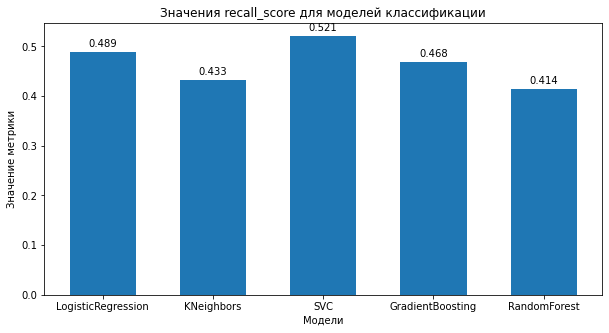

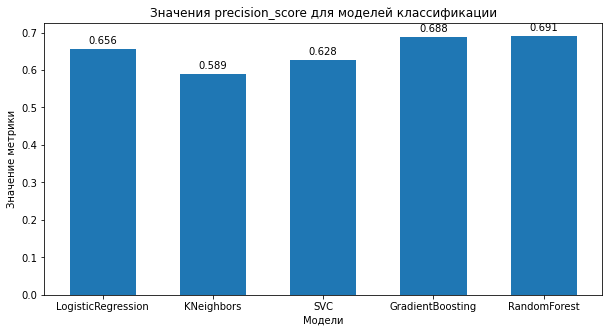

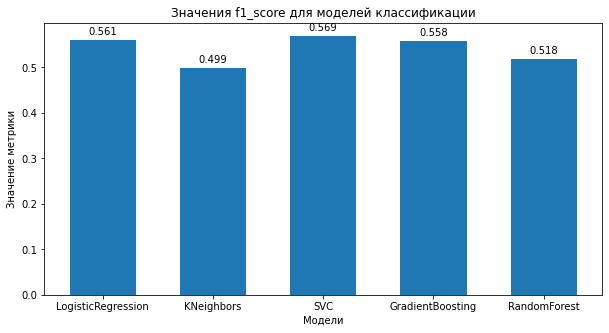

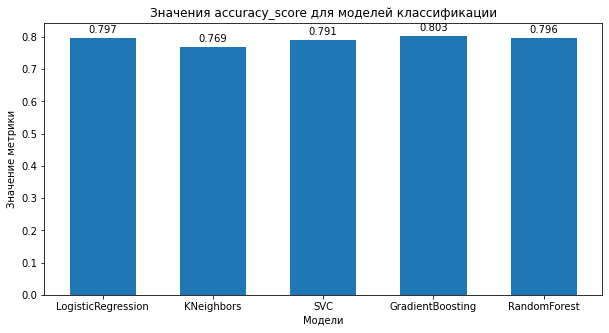

In [26]:
# Выведем полноту, точность и модели классификаторов

metrics_scores = [recall_score, precision_score, f1_score, accuracy_score]
predicts = [lr_predict, knn_predict, svc_predict, gbc_predict, rfc_predict]
models = ['LogisticRegression', 'KNeighbors', 'SVC', 'GradientBoosting', 'RandomForest']
scores = ['recall_score', 'precision_score', 'f1_score', 'accuracy_score']
values_list = []
for i, score in enumerate(metrics_scores):
    for pred in predicts:
        values_list.append(round(score(y_test, pred),3))    
    
    x = np.arange(len(models))  # Список координат столбцов по x
    
    fig, ax = plt.subplots(figsize=(10,5))  # Задаем параметры графика
    colls = ax.bar(x, values_list, 0.6)  # Определяем колонки для данных
    
    # Подписываем оси, таблицы, легенды
    ax.set_ylabel('Значение метрики')
    ax.set_xlabel('Модели')
    ax.set_title(f'Значения {scores[i]} для моделей классификации')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    
    # Создадим функцию для отображения столбцов
    def autolabel(rects):
        for col in colls:
            height = col.get_height()
            # Задаем параметры для аннотаций
            ax.annotate('{}'.format(height),
                        xy=(col.get_x() + col.get_width() / 2, height), # Получаем точки координат для текста
                        xytext=(0, 3),    # Высота текста над столбцами
                        # Располагаем текст относительно столбцов
                        textcoords="offset points",  
                        ha='center', va='bottom')
    
    autolabel(colls)  # Вызываем функцию
    values_list = []

plt.show()

## 4. Сравнение качества моделей

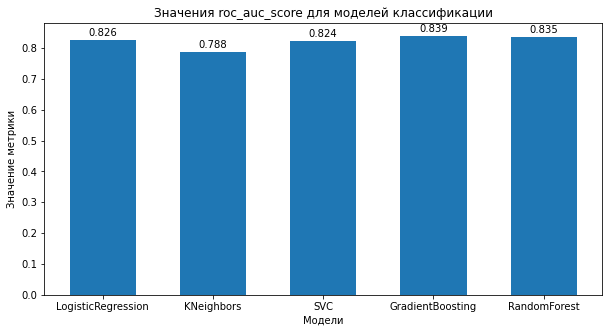

In [27]:
# Получим значения roc_auc_score для каждого классификатора

auc_list = []
models_2 = [lr_model, knn_model, svc_model, gbc_model, rfc_model]
for model in models_2:
    proba = model.predict_proba(X_test)
    auc_list.append(round(roc_auc_score(y_test, proba[:, 1]),3))
    
x = np.arange(len(models))  # Список координат столбцов по x

fig, ax = plt.subplots(figsize=(10,5))  # Задаем параметры графика
colls = ax.bar(x, auc_list, 0.6)  # Определяем колонки для данных

# Подписываем оси, таблицы, легенды
ax.set_ylabel('Значение метрики')
ax.set_xlabel('Модели')
ax.set_title('Значения roc_auc_score для моделей классификации')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Создадим функцию для отображения столбцов
def autolabel(colls):
    for col in colls:
        height = col.get_height()
        # Задаем параметры для аннотаций
        ax.annotate('{}'.format(height),
                    xy=(col.get_x() + col.get_width() / 2, height), # Получаем точки координат для текста
                    xytext=(0, 2),    # Высота текста над столбцами
                    # Располагаем текст относительно столбцов
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(colls)  # Вызываем функцию
values_list = []

plt.show()

В этой задаче классификатор GradientBoostingClassifier более точно предсказывает данные - roc_auc_score = 0.839

Классификатор SVC меньше всего подходит для предсказаний